In [1]:
#importing Some Basic Modules
import import_ipynb 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams

import scipy

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [2]:
google_data=pd.read_excel("C:\dataset\consumptionstatemon1.xlsx")

In [3]:
google_data.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
0,2009,1,AK,Total Electric Power Industry,Coal (Short Tons),42487.0
1,2009,1,AK,Total Electric Power Industry,Petroleum (Barrels),252710.0
2,2009,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3618363.0
3,2009,1,AK,"Electric Generators, Electric Utilities",Coal (Short Tons),17282.0
4,2009,1,AK,"Electric Generators, Electric Utilities",Petroleum (Barrels),245611.0


In [5]:
google_data.isnull() #checking null or missing values

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
12418,False,False,False,False,False,False
12419,False,False,False,False,False,False
12420,False,False,False,False,False,False
12421,False,False,False,False,False,False


In [6]:
google_data.isnull().sum() #summation of null values for each column

YEAR                                  0
MONTH                                 0
STATE                                 0
TYPE OF PRODUCER                      0
ENERGY SOURCE              (UNITS)    0
CONSUMPTION                           0
dtype: int64

In [7]:
google_data.describe()

,YEAR,MONTH,CONSUMPTION
count,12423.000000,12423.000000,1.242300e+04
mean,2009.253240,5.484344,3.372688e+06
std,0.434885,3.498311,2.545056e+07
min,2009.000000,1.000000,0.000000e+00
25%,2009.000000,2.000000,5.155000e+02
50%,2009.000000,4.000000,2.189700e+04
75%,2010.000000,8.000000,7.329150e+05
max,2010.000000,12.000000,8.601434e+08


In [8]:
# Normalize consumption column

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
CONSUMPTION = normalize(google_data.CONSUMPTION)
CONSUMPTION.describe()

count    1.242300e+04
mean     3.921076e-03
std      2.958874e-02
min      0.000000e+00
25%      5.993186e-07
50%      2.545738e-05
75%      8.520846e-04
max      1.000000e+00
Name: CONSUMPTION, dtype: float64

In [9]:
result=google_data.CONSUMPTION.transform(func = lambda x:x+10)  #transform consumption column
print (result)

0           42497.00
1          252720.00
2         3618373.00
3           17292.00
4          245621.00
            ...     
12418          10.00
12419      406159.00
12420      200301.00
12421    42734093.00
12422        5916.29
Name: CONSUMPTION, Length: 12423, dtype: float64


In [10]:
google_data.skew(axis=0,skipna=True)

YEAR            1.135012
MONTH           0.426165
CONSUMPTION    18.808054
dtype: float64

In [11]:
google_data.kurtosis()

YEAR            -0.711861
MONTH           -1.114627
CONSUMPTION    440.638181
dtype: float64

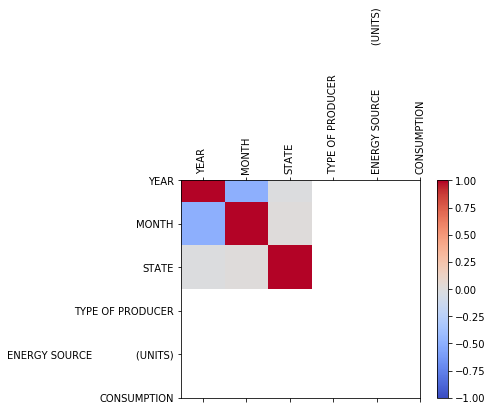

In [12]:
corr = google_data.corr()           #correlations in attribute
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(google_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(google_data.columns)
ax.set_yticklabels(google_data.columns)
plt.show()

In [13]:
google_data.dtypes    #checking feature types

YEAR                                    int64
MONTH                                   int64
STATE                                  object
TYPE OF PRODUCER                       object
ENERGY SOURCE              (UNITS)     object
CONSUMPTION                           float64
dtype: object

In [14]:
type(google_data)

pandas.core.frame.DataFrame

In [15]:
type(google_data.CONSUMPTION )

pandas.core.series.Series

In [16]:
type(google_data.YEAR   )

pandas.core.series.Series

In [17]:
AK=google_data[google_data.STATE=='AK']

In [18]:
AK  #displaying data only for state 'AK'

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
0,2009,1,AK,Total Electric Power Industry,Coal (Short Tons),42487.0
1,2009,1,AK,Total Electric Power Industry,Petroleum (Barrels),252710.0
2,2009,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3618363.0
3,2009,1,AK,"Electric Generators, Electric Utilities",Coal (Short Tons),17282.0
4,2009,1,AK,"Electric Generators, Electric Utilities",Petroleum (Barrels),245611.0
...,...,...,...,...,...,...
11645,2010,4,AK,"Combined Heat and Power, Commercial Power",Coal (Short Tons),7334.0
11646,2010,4,AK,"Combined Heat and Power, Commercial Power",Petroleum (Barrels),404.0
11647,2010,4,AK,"Combined Heat and Power, Commercial Power",Natural Gas (Mcf),0.0
11648,2010,4,AK,"Combined Heat and Power, Industrial Power",Petroleum (Barrels),4057.0


In [19]:
CT=google_data[google_data.STATE=='CT']

In [20]:
CT AK  #displaying data only for state 'CT'

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
91,2009,1,CT,Total Electric Power Industry,Coal (Short Tons),160145.0
92,2009,1,CT,Total Electric Power Industry,Petroleum (Barrels),273791.0
93,2009,1,CT,Total Electric Power Industry,Natural Gas (Mcf),4836112.0
94,2009,1,CT,"Electric Generators, Electric Utilities",Petroleum (Barrels),969.0
95,2009,1,CT,"Electric Generators, Electric Utilities",Natural Gas (Mcf),155.0
...,...,...,...,...,...,...
11743,2010,4,CT,"Combined Heat and Power, Electric Power",Natural Gas (Mcf),165295.0
11744,2010,4,CT,"Combined Heat and Power, Commercial Power",Petroleum (Barrels),8.0
11745,2010,4,CT,"Combined Heat and Power, Commercial Power",Natural Gas (Mcf),18535.0
11746,2010,4,CT,"Combined Heat and Power, Industrial Power",Petroleum (Barrels),107.0


In [21]:
import statsmodels.formula.api as smapi
lm=smapi.ols(formula="CONSUMPTION~MONTH",data=google_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CONSUMPTION   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.071
Date:                Sat, 25 Apr 2020   Prob (F-statistic):              0.301
Time:                        20:57:19   Log-Likelihood:            -2.2947e+05
No. Observations:               12423   AIC:                         4.589e+05
Df Residuals:                   12421   BIC:                         4.590e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.002e+06   4.25e+05      7.071      0.000    2.17e+06    3.83e+06
MONTH       6.755e+04   6.53e+04      1.035      0.301   -6.04e+04    1.95e+05
==============================================================================
Omnibus:                    26403.193   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        101106077.373
Skew:                          18.803   Prob(JB):                         0.00
Kurtosis:                     443.355   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Split our data into train and test sets
train_size = int(len(google_data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(google_data) - train_size))

Train size: 9938
Test size: 2485


In [23]:
#encoding of data
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in google_data.columns:
    google_data[col] = labelencoder.fit_transform(google_data[col])
 
google_data.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
0,0,0,0,5,0,4210
1,0,0,0,5,3,5776
2,0,0,0,5,1,8258
3,0,0,0,3,0,3301
4,0,0,0,3,3,5746


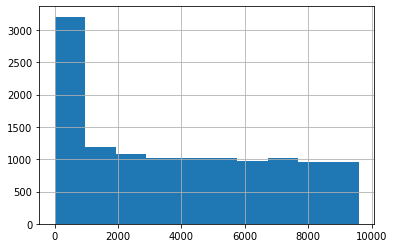

In [24]:
google_data.CONSUMPTION.hist()  #histogram representation for 'CONSUMPTION' column


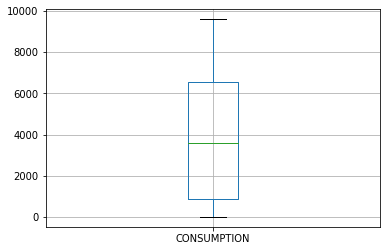

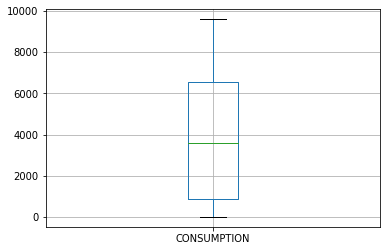

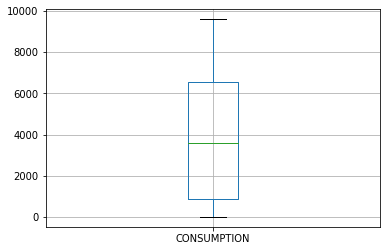

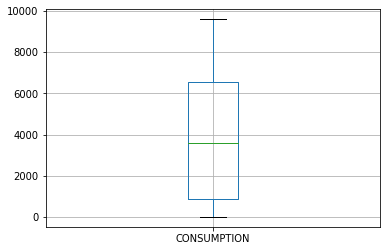

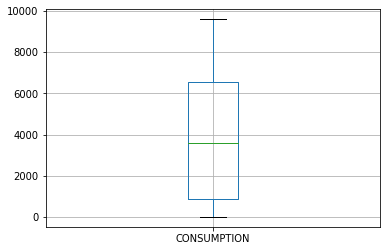

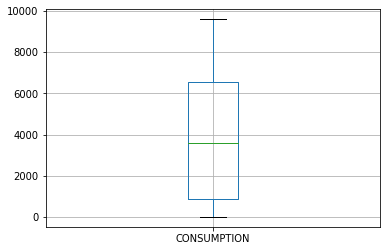

In [26]:
import matplotlib.pyplot as plt

for column in google_data:
    plt.figure()
    google_data.boxplot(['CONSUMPTION']) #boxplot representation for 'CONSUMPTION' column

In [27]:
X = google_data.iloc[:,1:23]  # all rows, all the features and no labels
y = google_data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: YEAR, dtype: int64

In [28]:
google_data.corr() 

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE (UNITS),CONSUMPTION
YEAR,1.000000,-0.497120,-0.000638,0.004564,0.003168,-0.017541
MONTH,-0.497120,1.000000,-0.000368,-0.000769,-0.001313,0.000767
STATE,-0.000638,-0.000368,1.000000,0.031601,-0.016774,0.014058
TYPE OF PRODUCER,0.004564,-0.000769,0.031601,1.000000,-0.022908,0.352898
ENERGY SOURCE (UNITS),0.003168,-0.001313,-0.016774,-0.022908,1.000000,-0.469273
CONSUMPTION,-0.017541,0.000767,0.014058,0.352898,-0.469273,1.000000


In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 3.23940865e+02,  2.57505574e+01, -4.48787659e+00,
        -1.85961595e+00,  1.85933845e+00],
       [ 1.88994026e+03,  2.58619770e+01, -4.49028237e+00,
        -2.19543172e+00, -1.42010535e+00],
       [ 4.37194053e+03,  2.60331707e+01, -4.49161798e+00,
        -1.42544695e+00,  1.02787561e-02],
       ...,
       [ 1.66894273e+03, -1.81438714e+01, -1.48401991e+00,
         8.35330862e-01, -2.01186549e+00],
       [ 5.53294294e+03, -1.78764654e+01, -1.48650763e+00,
         1.81936007e+00, -8.77757636e-01],
       [-1.52405697e+03, -1.83669613e+01, -1.48099130e+00,
         5.33584435e-01, -3.46102607e-01]])

In [30]:
covariance=pca.get_covariance()
#covariance

In [31]:
explained_variance=pca.explained_variance_
explained_variance

array([9.25724542e+06, 2.22254303e+02, 1.22381788e+01, 2.48977414e+00,
       1.01364513e+00])

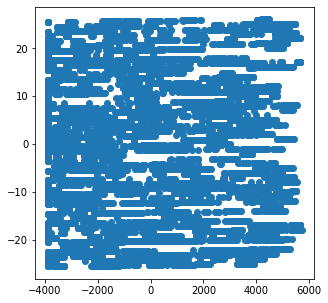

In [32]:
N=google_data.values            #take only first two principal components and visualise it using K-means clustering
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

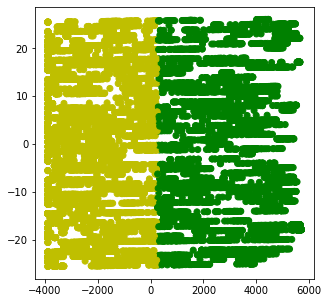

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [36]:
#gausion Naive bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [39]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 2485 points : 658


In [40]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

[0.25341915 0.25341915 0.62510056 1.         1.         1.
 1.         0.87348912 0.74697824 0.74697824]


In [41]:
scores.mean()

0.7499384465982912

In [42]:
acc=model_naive.score(X_test,y_test)*100
print("accuracy is:{:.2f}%".format(acc))

accuracy is:73.52%


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1345,  488],
       [ 170,  482]], dtype=int64)

In [45]:
auc_roc=metrics.classification_report(y_test,y_pred)   #accuracy precision recall
auc_roc 

'              precision    recall  f1-score   support\n\n           0       0.89      0.73      0.80      1833\n           1       0.50      0.74      0.59       652\n\n    accuracy                           0.74      2485\n   macro avg       0.69      0.74      0.70      2485\nweighted avg       0.79      0.74      0.75      2485\n'

In [46]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc


0.7365167900019747

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8217721124978663

Text(0.5, 0, 'False Positive Rate')

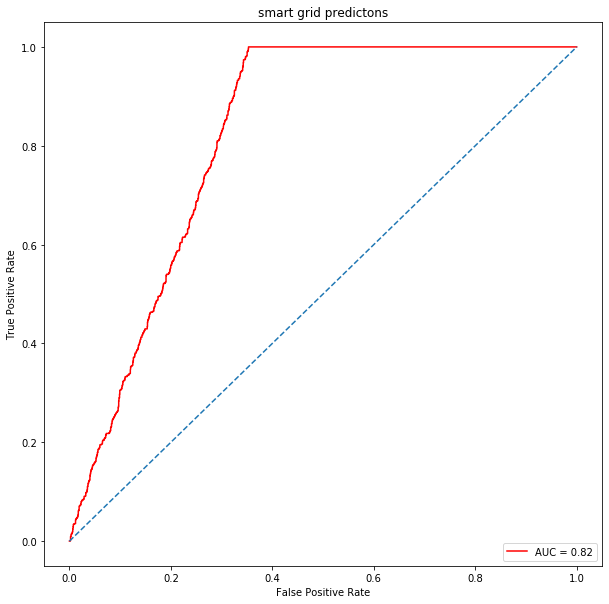

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('smart grid predictons')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')